In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set(font_scale=1.2)  # larger font
os.chdir('/Users/xiaodanxu/Documents/SynthFirm.nosync/')


In [2]:
vehicle_type_by_state = read_csv('inputs/fleet/fleet_composition_by_state.csv')
list_of_veh_tech = vehicle_type_by_state['vehicle category'].unique().tolist()

baseline_year = 2018
scenario_year = 2040

baseline_firms_with_fleet = read_csv('output_aus_fleet/synthetic_firms_with_fleet_'+ str(baseline_year) + '.csv')
baseline_carriers_with_fleet = read_csv('output_aus_fleet/synthetic_carriers_'+ str(baseline_year) + '.csv')
baseline_leasing_with_fleet = read_csv('output_aus_fleet/synthetic_leasing_company_'+ str(baseline_year) + '.csv')

alternative_firms_with_fleet = read_csv('output_aus_fleet/synthetic_firms_with_fleet_'+ str(scenario_year) + '.csv')
alternative_carriers_with_fleet = read_csv('output_aus_fleet/synthetic_carriers_'+ str(scenario_year) + '.csv')
alternative_leasing_with_fleet = read_csv('output_aus_fleet/synthetic_leasing_company_'+ str(scenario_year) + '.csv')

In [3]:
# aggregate baseline results
# adjust the total fleet

# national_fleet_composition.head(5)
baseline_firm_fleet_agg = baseline_firms_with_fleet.loc[:, list_of_veh_tech].sum()
baseline_firm_fleet_agg = baseline_firm_fleet_agg.to_frame()
baseline_firm_fleet_agg = baseline_firm_fleet_agg.reset_index()
baseline_firm_fleet_agg.columns = ['vehicle_type', 'total']
baseline_firm_fleet_agg.loc[:, 'source'] = 'firms'


baseline_carrier_fleet_agg = baseline_carriers_with_fleet.loc[:, list_of_veh_tech].sum()
baseline_carrier_fleet_agg = baseline_carrier_fleet_agg.to_frame()
baseline_carrier_fleet_agg = baseline_carrier_fleet_agg.reset_index()
baseline_carrier_fleet_agg.columns = ['vehicle_type', 'total']
baseline_carrier_fleet_agg.loc[:, 'source'] = 'carrier'

baseline_lease_fleet_agg = baseline_leasing_with_fleet.loc[:, list_of_veh_tech].sum()
baseline_lease_fleet_agg = baseline_lease_fleet_agg.to_frame()
baseline_lease_fleet_agg = baseline_lease_fleet_agg.reset_index()
baseline_lease_fleet_agg.columns = ['vehicle_type', 'total']
baseline_lease_fleet_agg.loc[:, 'source'] = 'lease'

baseline_fleet_agg = pd.concat([baseline_firm_fleet_agg, 
                                baseline_carrier_fleet_agg, baseline_lease_fleet_agg])
baseline_fleet_agg.head(5)


,vehicle_type,total,source
0,Diesel Class 4-6 Vocational,1376995,firms
1,Electric Class 4-6 Vocational,0,firms
2,Gasoline Class 4-6 Vocational,904645,firms
3,Diesel Class 7&8 Tractor,1340375,firms
4,Electric Class 7&8 Tractor,0,firms


In [5]:
# aggregate scenario results

alternative_firm_fleet_agg = alternative_firms_with_fleet.loc[:, list_of_veh_tech].sum()
alternative_firm_fleet_agg = alternative_firm_fleet_agg.to_frame()
alternative_firm_fleet_agg = alternative_firm_fleet_agg.reset_index()
alternative_firm_fleet_agg.columns = ['vehicle_type', 'total']
alternative_firm_fleet_agg.loc[:, 'source'] = 'firms'


alternative_carrier_fleet_agg = alternative_carriers_with_fleet.loc[:, list_of_veh_tech].sum()
alternative_carrier_fleet_agg = alternative_carrier_fleet_agg.to_frame()
alternative_carrier_fleet_agg = alternative_carrier_fleet_agg.reset_index()
alternative_carrier_fleet_agg.columns = ['vehicle_type', 'total']
alternative_carrier_fleet_agg.loc[:, 'source'] = 'carrier'

alternative_lease_fleet_agg = alternative_leasing_with_fleet.loc[:, list_of_veh_tech].sum()
alternative_lease_fleet_agg = alternative_lease_fleet_agg.to_frame()
alternative_lease_fleet_agg = alternative_lease_fleet_agg.reset_index()
alternative_lease_fleet_agg.columns = ['vehicle_type', 'total']
alternative_lease_fleet_agg.loc[:, 'source'] = 'lease'

alternative_fleet_agg = pd.concat([alternative_firm_fleet_agg, 
                                alternative_carrier_fleet_agg, alternative_lease_fleet_agg])
alternative_fleet_agg.head(5)

,vehicle_type,total,source
0,Diesel Class 4-6 Vocational,1191914,firms
1,Electric Class 4-6 Vocational,1367024,firms
2,Gasoline Class 4-6 Vocational,1208798,firms
3,Diesel Class 7&8 Tractor,1435648,firms
4,Electric Class 7&8 Tractor,421232,firms


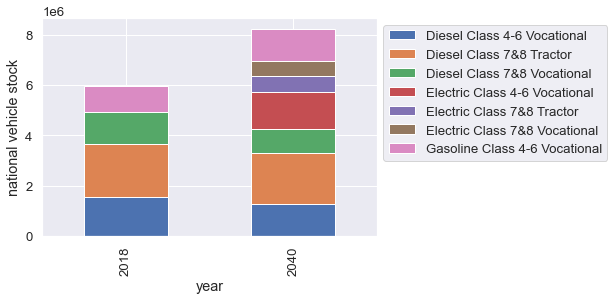

In [10]:
baseline_fleet_agg.loc[:, 'year'] = baseline_year
alternative_fleet_agg.loc[:, 'year'] = scenario_year

combined_fleet_agg = pd.concat([baseline_fleet_agg, alternative_fleet_agg])
combined_fleet_to_plot = pd.pivot_table(combined_fleet_agg,
                                        values='total', index=['year'],
                                        columns=['vehicle_type'], 
                                        aggfunc=np.sum)
combined_fleet_to_plot.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel('national vehicle stock')
plt.savefig('output_aus_fleet/fleet_composition.png', dpi = 300, bbox_inches = 'tight')

In [12]:
combined_fleet_to_plot.head(2)

vehicle_type,Diesel Class 4-6 Vocational,Diesel Class 7&8 Tractor,Diesel Class 7&8 Vocational,Electric Class 4-6 Vocational,Electric Class 7&8 Tractor,Electric Class 7&8 Vocational,Gasoline Class 4-6 Vocational
year,,,,,,,
2018,1531156,2115002,1289885,6,1,174,1012045
2040,1282908,2023889,954712,1469906,638602,575271,1300877


In [13]:
print(combined_fleet_to_plot.sum(axis=1))

year
2018    5948269
2040    8246165
dtype: int64
